# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

In [2]:
import spacy
import torch
import torch.nn as nn
import torchtext

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import torchtext.data as data
from torchtext.data import Field, BucketIterator, TabularDataset
from torchtext.data.metrics import bleu_score

# **Importing Dataset**

In [4]:
dataset_train = pd.read_csv('Dataset/train_regipa.csv')
dataset_train.head()

,Index,District,Contents,IPA
0,rng_0,Rangpur,"লেখিয়্যা, কালি দিয়্যা, সেই সুন্দর করিয়া, এখন স...","lekʰɪʲt̪ɐ, kɐlɪ d̪ɪkt̪ɐ, ʃe͡ɪ̯ ʃund̪ɔɾ koɾɪʲɐ,..."
1,rng_1,Rangpur,"হ, একটা ফিল্ডিং গ্রুপ ছিলো।","ho, ɛktɐ pʰɪldɪŋ gɾup cʰɪlo।"
2,rng_2,Rangpur,"হ, ওরে কতা <> বুজচি বিষয়টা, ওয় তো এখনও বেরাজিল...","ho, oɾe kɔt̪ɐ <> buɟcɪ bɪʃɔʲtɐ, oe̯ t̪o ɛkʰono..."
3,rng_3,Rangpur,"সিডায়, ওই সমায় আমরা ওই কানির রুমটাত যকন আছনো এ...","ʃɪdɐe̯, o͡ɪ̯ ʃɔmɐe̯ ɐmɾɐ o͡ɪ̯ kɐnɪɾ ɾumtɐt̪ ɟɔ..."
4,rng_4,Rangpur,"যকন কী ইয়্যা হইছিল, ওই যে সুমন আর হইলো আলম <> ...","ɟɔkon kɪ ɪʲlɐ ho͡ɪ̯cʰɪlo, o͡ɪ̯ ɟe ʃumɔn ɐɾ ho͡..."


<Axes: >

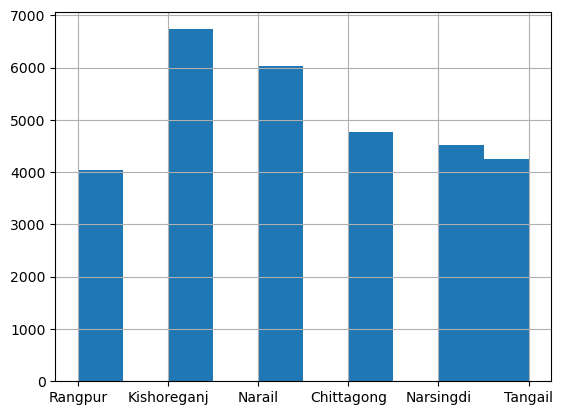

In [5]:
dataset_train.District.hist()

In [6]:
sample_submission = pd.read_csv('Dataset/sample_submission.csv')
sample_submission.head()

,id,string
0,0,ɐbbɐ͡ɪ̯ tʰɪk koɾcʰe।
1,1,ɐbbɐ͡ɪ̯ tʰɪk koɾcʰe।
2,2,ɐbbɐ͡ɪ̯ tʰɪk koɾcʰe।
3,3,ɐbbɐ͡ɪ̯ tʰɪk koɾcʰe।
4,4,ɐbbɐ͡ɪ̯ tʰɪk koɾcʰe।


# **Filtering Dataset**

<Axes: >

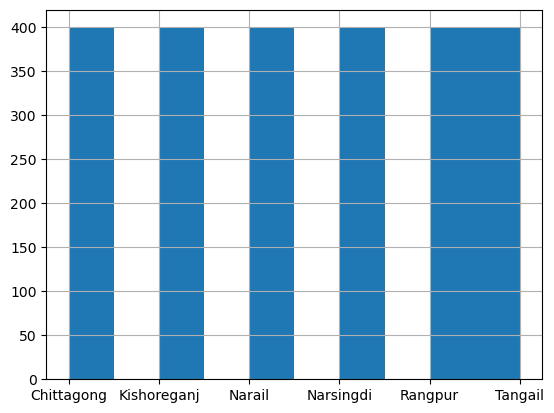

In [7]:
rows_to_keep_per_category = 400

dataset_train = dataset_train.groupby('District')
dataset_train.head()

def select_rows(group):
    return group.head(rows_to_keep_per_category)

dataset_train = dataset_train.apply(select_rows).reset_index(drop=True)
dataset_train.District.hist()

# **Performing EDA into the dataset**

In [8]:
dataset_train.shape

(2400, 4)

In [9]:
dataset_train.describe()

,Index,District,Contents,IPA
count,2400,2400,2400,2000
unique,2400,6,2378,1982
top,ctg_0,Chittagong,<>,ho।
freq,1,400,4,4


In [10]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Index     2400 non-null   object
 1   District  2400 non-null   object
 2   Contents  2400 non-null   object
 3   IPA       2000 non-null   object
dtypes: object(4)
memory usage: 75.1+ KB


In [11]:
dataset_train.isna().sum()

Index         0
District      0
Contents      0
IPA         400
dtype: int64

In [12]:
dataset_train.drop_duplicates(inplace=True)

In [13]:
dataset_train.District.value_counts()

District
Chittagong     400
Kishoreganj    400
Narail         400
Narsingdi      400
Rangpur        400
Tangail        400
Name: count, dtype: int64

C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


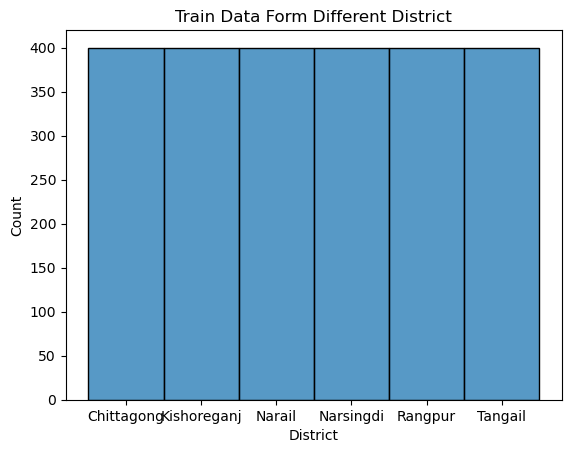

In [14]:
sns.histplot(dataset_train.District)
plt.xlabel('District')
plt.ylabel('Count')
plt.title("Train Data Form Different District")
plt.show()

In [15]:
dataset_train_without_na = dataset_train.dropna().copy()

In [16]:
dataset_train_without_na.isna().sum()

Index       0
District    0
Contents    0
IPA         0
dtype: int64

In [17]:
dataset_train.isna().sum()

Index         0
District      0
Contents      0
IPA         400
dtype: int64

In [18]:
dataset_train_without_na.shape

(2000, 4)

In [19]:
dataset_train_without_na.District.value_counts()

District
Kishoreganj    400
Narail         400
Narsingdi      400
Rangpur        400
Tangail        400
Name: count, dtype: int64

C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


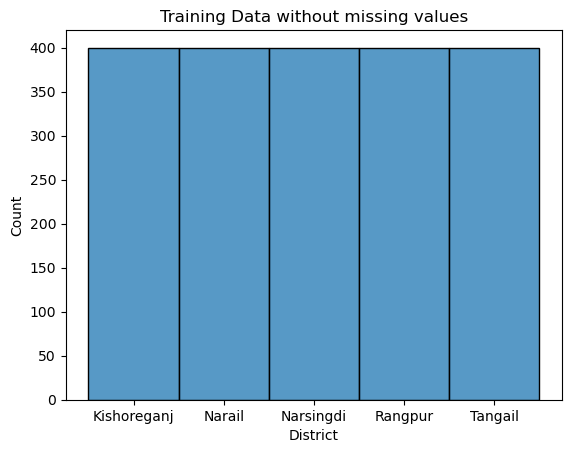

In [20]:
sns.histplot(dataset_train_without_na.District)
plt.xlabel("District")
plt.ylabel("Count")
plt.title("Training Data without missing values")
plt.show()

In [21]:
dataset_train_only_na = dataset_train[dataset_train.IPA.isna()].copy()
dataset_train_only_na.head()

,Index,District,Contents,IPA
0,ctg_0,Chittagong,যেত্তে টাইম ফায় এত্তে এ দুনোউয়ারে অফমান গরে।,NaN
1,ctg_1,Chittagong,"ইতেরা সি আর অইয়্যে ইতারা, অফমান গইরতু ন ক্যায়া!",NaN
2,ctg_2,Chittagong,মানে ইতারার খাতা দেহে দে ইতারা ত্রিশের মধ্যে এ...,NaN
3,ctg_3,Chittagong,খয়দে সিআরের এইল্লা কি অবস্থা!,NaN
4,ctg_4,Chittagong,ছি!,NaN


In [22]:
dataset_train_only_na.shape

(400, 4)

In [23]:
dataset_train_only_na.District.value_counts()

District
Chittagong    400
Name: count, dtype: int64

C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


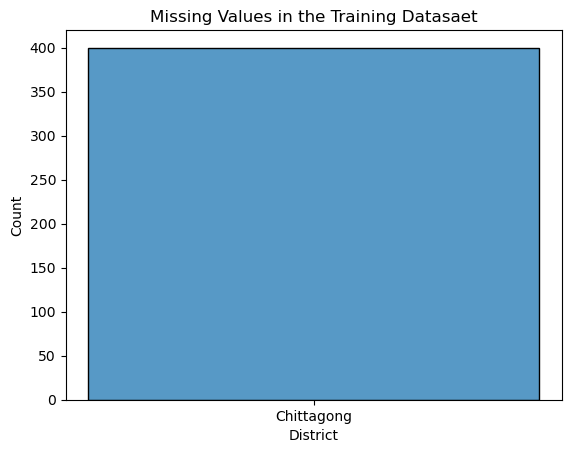

In [24]:
sns.histplot(dataset_train_only_na.District)
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Missing Values in the Training Datasaet')
plt.show()

# **Formating The Dataset and Export**

In [25]:
dataset_train_without_na.columns

Index(['Index', 'District', 'Contents', 'IPA'], dtype='object')

In [26]:
train = dataset_train_without_na[['Contents', 'IPA']].copy()

In [27]:
train.head()

,Contents,IPA
400,"আটাইশ করছিলাম দের কানি ক্ষেত, ইবার মাইর কাইছি।","ɐtɐ͡ɪ̯ʃ koɾcʰɪlɐm d̪eɾ kɐnɪ kʰet̪, ɪbɐɾ mɐ͡ɪ̯ɾ..."
401,"মাত্র অইছে দশ, এগারো <> আডাইশ করছুইন দের কানি,...","mɐt̪ɾo e͡ɪ̯cʰe d̪ɔʃ, ɛgɐɾo <> ɐdɐ͡ɪ̯ʃ koɾcʰu͡ɪ..."
402,হ।,ho।
403,"তে আডাইশ যে করছিলাইন, এডার বুদ্দি দিছিন কেলা?","t̪e ɐdɐ͡ɪ̯ʃ ɟe koɾcʰɪlɐ͡ɪ̯n, edɐɾ bud̪d̪ɪ d̪ɪc..."
404,আরে কইন না যে এক ফাগলা বুদ্দি দিছিন <> আডাইশ ব...,ɐɾe ko͡ɪ̯n nɐ ɟe ɛk pʰɐglɐ bud̪d̪ɪ d̪ɪcʰɪn <> ...


In [28]:
train.to_csv('train.csv',index=False)

In [29]:
pd.read_csv('train.csv').head()

,Contents,IPA
0,"আটাইশ করছিলাম দের কানি ক্ষেত, ইবার মাইর কাইছি।","ɐtɐ͡ɪ̯ʃ koɾcʰɪlɐm d̪eɾ kɐnɪ kʰet̪, ɪbɐɾ mɐ͡ɪ̯ɾ..."
1,"মাত্র অইছে দশ, এগারো <> আডাইশ করছুইন দের কানি,...","mɐt̪ɾo e͡ɪ̯cʰe d̪ɔʃ, ɛgɐɾo <> ɐdɐ͡ɪ̯ʃ koɾcʰu͡ɪ..."
2,হ।,ho।
3,"তে আডাইশ যে করছিলাইন, এডার বুদ্দি দিছিন কেলা?","t̪e ɐdɐ͡ɪ̯ʃ ɟe koɾcʰɪlɐ͡ɪ̯n, edɐɾ bud̪d̪ɪ d̪ɪc..."
4,আরে কইন না যে এক ফাগলা বুদ্দি দিছিন <> আডাইশ ব...,ɐɾe ko͡ɪ̯n nɐ ɟe ɛk pʰɐglɐ bud̪d̪ɪ d̪ɪcʰɪn <> ...


# **Data Preprocessing**

In [30]:
Contents = Field(tokenize=lambda x:x.split(),init_token='<sos>',eos_token='<eos>',batch_first=True)
IPA = Field(tokenize=lambda x:x.split(),init_token='<sos>',eos_token='<eos>',batch_first=True)

In [31]:
fields = [('src', Contents), ('trg', IPA)]

In [32]:
dataset = TabularDataset(
    path='train.csv',
    format='csv',
    fields=fields,
    skip_header=True
)

In [33]:
train_data, valid_data = dataset.split(split_ratio=0.8)

In [34]:
Contents.build_vocab(train_data)
IPA.build_vocab(train_data)

In [35]:
list(Contents.vocab.stoi.keys())[:20]

['<unk>',
 '<pad>',
 '<sos>',
 '<eos>',
 '<>',
 'তো',
 'না',
 'না।',
 'কি',
 'আমি',
 'আর',
 'যে',
 'এই',
 'কিন্তু',
 'ওই',
 'ভালো',
 'আমার',
 'ও',
 'মনে',
 'একটা']

In [36]:
list(IPA.vocab.stoi.keys())[:20]

['<unk>',
 '<pad>',
 '<sos>',
 '<eos>',
 '<>',
 't̪o',
 'nɐ',
 'nɐ।',
 'kɪ',
 'ɐmɪ',
 'ɐɾ',
 'ɟe',
 'e͡ɪ̯',
 'o͡ɪ̯',
 'kɪnt̪u',
 'bʱɐlo',
 'ɐmɐɾ',
 'o',
 'mone',
 'ɛktɐ']

In [37]:
print(f"Content vocab: {len(Contents.vocab)} || IPA vocab: {len(IPA.vocab)}")

Content vocab: 4533 || IPA vocab: 4483


In [38]:
max_len = 0

for sent in dataset_train_without_na.Contents:
    sent_len = len(sent.split())
    max_len = max(max_len,sent_len)
print(max_len)

56


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
load_model = False
save_model = True

cpu


In [40]:
batch_size = 258

train_iterator, valid_iterator = BucketIterator.splits(
    (train_data, valid_data),
    batch_size=batch_size,
    sort_within_batch=True,
    sort_key=lambda x: len(x.src),
    device= device
)

# **Utilities Functions**

In [41]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)


def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

In [42]:
def translate_sentence(model, sentence, Contents, IPA, device, max_length=64):
    tokenizer = lambda x: x.split()
    if type(sentence) == str:
        tokens = tokenizer(sentence)
    else:
        tokens = [token for token in sentence]

    tokens.insert(0, Contents.init_token)
    tokens.append(Contents.eos_token)

    text_to_indices = [Contents.vocab.stoi[token] for token in tokens]

    sentence_tensor = torch.LongTensor(text_to_indices).unsqueeze(1).to(device)

    outputs = [IPA.vocab.stoi["<sos>"]]
    for i in range(max_length):
        trg_tensor = torch.LongTensor(outputs).unsqueeze(1).to(device)

        with torch.no_grad():
            output = model(sentence_tensor, trg_tensor)

        best_guess = output.argmax(2)[-1, :].item()
        outputs.append(best_guess)

        if best_guess == IPA.vocab.stoi["<eos>"]:
            break

    translated_sentence = [IPA.vocab.itos[idx] for idx in outputs]
    return translated_sentence[1:]


In [43]:
def bleu(data, model, Contents, IPA, device):
    targets = []
    outputs = []

    for example in data:
        src = vars(example)["src"]
        trg = vars(example)["trg"]

        prediction = translate_sentence(model, src, Contents, IPA, device)
        prediction = prediction[:-1]  # remove <eos> token

        targets.append([trg])
        outputs.append(prediction)

    return bleu_score(outputs, targets)


# Seq2Seq Attention

In [44]:

class Encoder(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, num_layers, p):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(embedding_size, hidden_size, num_layers, bidirectional=True)

        self.fc_hidden = nn.Linear(hidden_size * 2, hidden_size)
        self.fc_cell = nn.Linear(hidden_size * 2, hidden_size)
        self.dropout = nn.Dropout(p)

    def forward(self, x):

        embedding = self.dropout(self.embedding(x))

        encoder_states, (hidden, cell) = self.rnn(embedding)
        hidden = self.fc_hidden(torch.cat((hidden[0:1], hidden[1:2]), dim=2))
        cell = self.fc_cell(torch.cat((cell[0:1], cell[1:2]), dim=2))

        return encoder_states, hidden, cell


In [45]:

class Decoder(nn.Module):
    def __init__(
        self, input_size, embedding_size, hidden_size, output_size, num_layers, p
    ):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(hidden_size * 2 + embedding_size, hidden_size, num_layers)

        self.energy = nn.Linear(hidden_size * 3, 1)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(p)
        self.softmax = nn.Softmax(dim=0)
        self.relu = nn.ReLU()

    def forward(self, x, encoder_states, hidden, cell):
        x = x.unsqueeze(0)

        embedding = self.dropout(self.embedding(x))

        sequence_length = encoder_states.shape[0]
        h_reshaped = hidden.repeat(sequence_length, 1, 1)

        energy = self.relu(self.energy(torch.cat((h_reshaped, encoder_states), dim=2)))

        attention = self.softmax(energy)
        context_vector = torch.einsum("snk,snl->knl", attention, encoder_states)

        rnn_input = torch.cat((context_vector, embedding), dim=2)

        outputs, (hidden, cell) = self.rnn(rnn_input, (hidden, cell))

        predictions = self.fc(outputs).squeeze(0)

        return predictions, hidden, cell

In [46]:

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, source, target, teacher_force_ratio=0.5):
        batch_size = source.shape[1]
        target_len = target.shape[0]
        target_vocab_size = len(IPA.vocab)

        outputs = torch.zeros(target_len, batch_size, target_vocab_size).to(device)
        encoder_states, hidden, cell = self.encoder(source)

        x = target[0]

        for t in range(1, target_len):
            output, hidden, cell = self.decoder(x, encoder_states, hidden, cell)

            outputs[t] = output

            best_guess = output.argmax(1)

            x = target[t] if np.random.random() < teacher_force_ratio else best_guess

        return outputs


In [47]:

num_epochs = 100
learning_rate = 3e-4
batch_size = 32

input_size_encoder = len(Contents.vocab)
input_size_decoder = len(IPA.vocab)
output_size = len(IPA.vocab)
encoder_embedding_size = 100
decoder_embedding_size = 100
hidden_size = 1024
num_layers = 1
enc_dropout = 0.0
dec_dropout = 0.0

In [48]:
encoder_net = Encoder(
    input_size_encoder, encoder_embedding_size, hidden_size, num_layers, enc_dropout
).to(device)

decoder_net = Decoder(
    input_size_decoder,
    decoder_embedding_size,
    hidden_size,
    output_size,
    num_layers,
    dec_dropout,
).to(device)

model = Seq2Seq(encoder_net, decoder_net).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
pad_idx = Contents.vocab.stoi["<pad>"]
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)

In [49]:
if load_model:
    load_checkpoint(torch.load("my_checkpoint.pth.tar"), model, optimizer)


# **Training the Model**

In [51]:
train_losses = []
for epoch in range(20):
    print(f'Epoch:{epoch+1}/{num_epochs}')
    if save_model:
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer": optimizer.state_dict(),
        }
        save_checkpoint(checkpoint)

    train_loss = []
    for batch_idx, batch in enumerate(tqdm(train_iterator)):

        inp_data = batch.src.to(device)
        target = batch.trg.to(device)

        output = model(inp_data, target)

        output = output[1:].reshape(-1, output.shape[2])
        target = target[1:].reshape(-1)

        optimizer.zero_grad()
        loss = criterion(output, target)
        train_loss.append(loss.item())
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

        optimizer.step()

    train_losses.append(np.mean(train_loss))
    

Epoch:1/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [11:40<00:00, 100.09s/it]


Epoch:2/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [11:40<00:00, 100.08s/it]


Epoch:3/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:28<00:00, 89.80s/it]


Epoch:4/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:05<00:00, 86.45s/it]


Epoch:5/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:09<00:00, 87.09s/it]


Epoch:6/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:04<00:00, 86.42s/it]


Epoch:7/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:15<00:00, 87.97s/it]


Epoch:8/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:49<00:00, 92.80s/it]


Epoch:9/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [12:15<00:00, 105.07s/it]


Epoch:10/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [12:13<00:00, 104.78s/it]


Epoch:11/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [13:10<00:00, 112.89s/it]


Epoch:12/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [12:03<00:00, 103.38s/it]


Epoch:13/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [13:09<00:00, 112.83s/it]


Epoch:14/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [12:09<00:00, 104.20s/it]


Epoch:15/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [13:23<00:00, 114.82s/it]


Epoch:16/100
=> Saving checkpoint


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [12:06<00:00, 103.74s/it]


Epoch:17/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:48<00:00, 92.65s/it]


Epoch:18/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:24<00:00, 89.16s/it]


Epoch:19/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:20<00:00, 88.65s/it]


Epoch:20/100
=> Saving checkpoint


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [10:52<00:00, 93.28s/it]


C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sirfowahid\anaconda3\envs\Pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

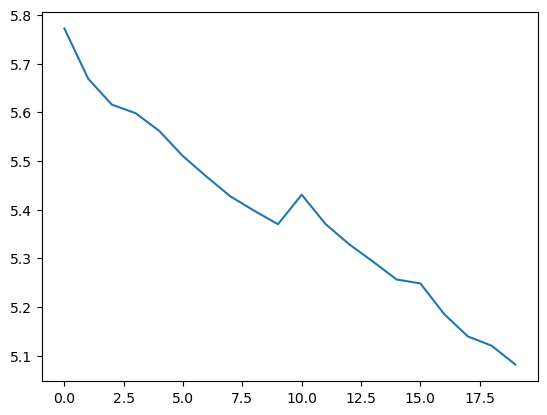

In [52]:
sns.lineplot(train_losses)
plt.show()

In [57]:
bleu(train_iterator, model, Contents, IPA, device)

TypeError: split_with_sizes(): argument 'split_sizes' (position 2) must be tuple of ints, not str

# **Making Prediction With Test Data**

In [54]:
dataset_test = pd.read_csv('Dataset/test_regipa.csv')
dataset_test.head()

,Index,District,Contents
0,0,Rangpur,এলা সবায় সবার হাতোত <> অসহায় মানুষ আচে?
1,1,Rangpur,কেউ কারো ইয়া নাই।
2,2,Rangpur,"এলা ওই যে, কাইলকা ব্যাটায় ইপতারি আনচে, খাইচোং,..."
3,3,Rangpur,আর মুই আগোত কী করচিনু?
4,4,Rangpur,"<> আগের কতা বাদ দেও, এলা নাই।"


In [ ]:
dataset_test["IPA"] = dataset_test.apply(lambda x:translate_sentence(model, x, Contents, IPA, device, max_length=64),axis=1)
dataset_test.head()

In [56]:
translate_sentence(model, dataset_test.Contents[0], Contents, IPA, device, max_length=64)

['<unk>',
 '<sos>',
 '<sos>',
 '<sos>',
 '<sos>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>',
 '<>']